## Loading the Data:

In [1]:
#Load necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

In [2]:
#Loading the data:
categories = [
    'alt.atheism',
    'comp.graphics',
    'comp.os.ms-windows.misc',
    'comp.sys.ibm.pc.hardware',
    'comp.sys.mac.hardware',
    'comp.windows.x',
    'misc.forsale',
    'rec.autos',
    'rec.motorcycles',
    'rec.sport.baseball',
    'rec.sport.hockey',
    'sci.crypt',
    'sci.electronics',
    'sci.med',
    'sci.space',
    'soc.religion.christian',
    'talk.politics.guns',
    'talk.politics.mideast',
    'talk.politics.misc',
    'talk.religion.misc'
]
#Extracting train data and saving it into "data" list
import os
data = []
for i in categories:
    file_numbers = os.listdir('20news-bydate-train/'+i)
    for j in range(len(file_numbers)):
        with open('20news-bydate-train/'+i+'/'+file_numbers[j]) as f:
            data.append((i, f.read()))

#Extracting test data and saving it into "data" list
for i in categories:
    file_numbers = os.listdir('20news-bydate-test/'+i)
    for j in range(len(file_numbers)):
        with open('20news-bydate-test/'+i+'/'+file_numbers[j]) as f:
            data.append((i, f.read()))
print(len(data))

18846


In [3]:
#Convert "data" list to DataFrame
data = pd.DataFrame(data, columns=['target', 'email'])
data.head()

,target,email
0,alt.atheism,From: mathew <mathew@mantis.co.uk>\nSubject: A...
1,alt.atheism,From: mathew <mathew@mantis.co.uk>\nSubject: A...
2,alt.atheism,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...
3,alt.atheism,From: mathew <mathew@mantis.co.uk>\nSubject: R...
4,alt.atheism,From: strom@Watson.Ibm.Com (Rob Strom)\nSubjec...


## Cleaning the Data:

In [4]:
#Take a look at the contents of an email
data['email'][2]

'From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Rosenau)\nSubject: Re: Gospel Dating\nOrganization: Technical University Braunschweig, Germany\nLines: 93\n\nIn article <65974@mimsy.umd.edu>\nmangoe@cs.umd.edu (Charley Wingate) writes:\n \n>>Well, John has a quite different, not necessarily more elaborated theology.\n>>There is some evidence that he must have known Luke, and that the content\n>>of Q was known to him, but not in a \'canonized\' form.\n>\n>This is a new argument to me.  Could you elaborate a little?\n>\n \nThe argument goes as follows: Q-oid quotes appear in John, but not in\nthe almost codified way they were in Matthew or Luke. However, they are\nconsidered to be similar enough to point to knowledge of Q as such, and\nnot an entirely different source.\n \n \n>>Assuming that he knew Luke would obviously put him after Luke, and would\n>>give evidence for the latter assumption.\n>\n>I don\'t think this follows.  If you take the most traditional attributions,\n>then Luke might 

To remove all html tags from the emails, we will use preprocessor function.

In [5]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text

data['email'] = data['email'].apply(preprocessor)
data['email'][2]

'from i3150101 dbstu1 rz tu bs de benedikt rosenau subject re gospel dating organization technical university braunschweig germany lines 93 in article mangoe cs umd edu charley wingate writes well john has a quite different not necessarily more elaborated theology there is some evidence that he must have known luke and that the content of q was known to him but not in a canonized form this is a new argument to me could you elaborate a little the argument goes as follows q oid quotes appear in john but not in the almost codified way they were in matthew or luke however they are considered to be similar enough to point to knowledge of q as such and not an entirely different source assuming that he knew luke would obviously put him after luke and would give evidence for the latter assumption i don t think this follows if you take the most traditional attributions then luke might have known john but john is an elder figure in either case we re talking spans of time here which are well with

In [6]:
#Let's convert categorical target values into numerical values from 0 to 19
class_le = LabelEncoder()
data['target'] = class_le.fit_transform(data['target'].values)
data.head()

,target,email
0,0,from mathew subject alt atheism faq atheist re...
1,0,from mathew subject alt atheism faq introducti...
2,0,from i3150101 dbstu1 rz tu bs de benedikt rose...
3,0,from mathew subject re university violating se...
4,0,from strom watson ibm com rob strom subject re...


In [7]:
#Randomize indices
data = data.reindex(np.random.permutation(data.index))

data.head()

,target,email
12549,3,from tschannf iauf5 unifr ch tschannen frederi...
4023,7,subject convertibles from bouton gertrude cms ...
18675,19,from livesey solntze wpd sgi com jon livesey s...
8315,14,from henry zoo toronto edu henry spencer subje...
9210,15,from kempmp phoenix oulu fi petri pihko subjec...


## Exploratory Data Analysis:

### Are There Any Missing Data?

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18846 entries, 12549 to 10598
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  18846 non-null  int32 
 1   email   18846 non-null  object
dtypes: int32(1), object(1)
memory usage: 368.1+ KB


We do not have missing data.

### Are There Any Duplicates in the Data?

In [9]:
data.groupby('target').describe()

email                                                               
       count unique                                                top freq
target                                                                     
0        799    799  from livesey solntze wpd sgi com jon livesey s...    1
1        973    973  from graeme labtam labtam oz au graeme gill su...    1
2        985    985  from dsiegel optima cs arizona edu seagull sub...    1
3        982    982  from msfuller cc utah edu marc s fuller subjec...    1
4        963    963  from wirehead cheshire oxy edu david j harr su...    1
5        988    988  from hannguye nosc mil han n nguyen subject ac...    1
6        975    973  from er1 eridan chuvashia su yarabayeva albina...    2
7        990    990  organization penn state university from subjec...    1
8        996    996  from nrmendel unix amherst edu nathaniel mende...    1
9        994    994  from drw3l delmarva evsc virginia edu david ro...    1
10       999    999  from au021 cleveland freenet edu roland behuni...    1
11       991    991  from rdippold qualcomm com ron asbestos dippol...    1
12       984    984  from wayne alan martin subject re dayton hamfe...    1
13       990    990  from n3022 cray com jim knoll subject patti du...    1
14       987    987  from jpg bnr co uk jonathan p gibbons subject ...    1
15       997    997  from atterlep vela acs oakland edu cardinal xi...    1
16       910    910  from dbernard clesun central sun com dave bern...    1
17       940    940  from sera zuma uucp serdar argic subject re pr...    1
18       775    775  from roby chopin udel edu scott w roby subject...    1
19       628    628  from caldwell facman ohsu edu larry caldwell s...    1

We see that in group 6 we have duplicates, let's drop them from the dataset.

In [10]:
data.drop_duplicates(inplace=True)
data.groupby('target').describe()

email                                                               
       count unique                                                top freq
target                                                                     
0        799    799  from livesey solntze wpd sgi com jon livesey s...    1
1        973    973  from graeme labtam labtam oz au graeme gill su...    1
2        985    985  from dsiegel optima cs arizona edu seagull sub...    1
3        982    982  from msfuller cc utah edu marc s fuller subjec...    1
4        963    963  from wirehead cheshire oxy edu david j harr su...    1
5        988    988  from hannguye nosc mil han n nguyen subject ac...    1
6        973    973  from harmon math ohio state edu jim harmon sub...    1
7        990    990  organization penn state university from subjec...    1
8        996    996  from nrmendel unix amherst edu nathaniel mende...    1
9        994    994  from drw3l delmarva evsc virginia edu david ro...    1
10       999    999  from au021 cleveland freenet edu roland behuni...    1
11       991    991  from rdippold qualcomm com ron asbestos dippol...    1
12       984    984  from wayne alan martin subject re dayton hamfe...    1
13       990    990  from n3022 cray com jim knoll subject patti du...    1
14       987    987  from jpg bnr co uk jonathan p gibbons subject ...    1
15       997    997  from atterlep vela acs oakland edu cardinal xi...    1
16       910    910  from dbernard clesun central sun com dave bern...    1
17       940    940  from sera zuma uucp serdar argic subject re pr...    1
18       775    775  from roby chopin udel edu scott w roby subject...    1
19       628    628  from caldwell facman ohsu edu larry caldwell s...    1

### How Long are the Emails:

In [11]:
data['length'] = data['email'].map(lambda text: len(text))
data.head()
data['length'].min()

107

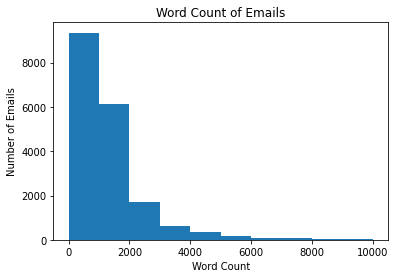

In [12]:
plt.hist(data['length'], bins = [0,1000, 2000,3000,4000,5000,6000,7000,8000,9000,10000])
plt.title("Word Count of Emails") 
plt.xlabel('Word Count')
plt.ylabel('Number of Emails')
plt.show()

In [13]:
data.length.describe()

count    18844.000000
mean      1633.540437
std       3082.500584
min        107.000000
25%        646.750000
50%       1006.000000
75%       1640.000000
max      67560.000000
Name: length, dtype: float64

We observe that the most frequent word count is 1000 or less. Very few of the emails contain more than 4000 words. On average, there are 1634 words in emails, and somebody took the time to write an email containing 67560 words!

### Is There Any Difference in Email Length Between Newsgroups?

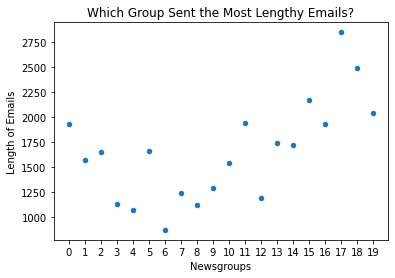

In [14]:
length_per_newsgroup = pd.DataFrame(data.groupby('target')['length'].mean(), columns=[ 'length'])
l_per_news = length_per_newsgroup.reset_index()
l_per_news.plot(x='target', y='length',kind='scatter')
ticks=list(l_per_news['target'])
plt.xticks(ticks)
plt.xlabel('Newsgroups')
plt.ylabel('Length of Emails')
plt.title('Which Group Sent the Most Lengthy Emails?')
plt.show()

On average, Group 17, which corresponds to 'talk.politics.mideast' sent the most lengthy emails. 'talk.politics.misc' and 'talk.religion.misc' are the second and third runner-ups respectively. This is not surprising, as the politics and religion are two topics people are generally very passionate to talk about.